In [1]:
#import drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
folders = os.listdir('/content/drive/My Drive/Abhishek/fellowshipai/raw-food/dataset/images')


In [0]:
for folder in folders:
  image_rename_all(folder)

In [0]:
#import libraries
from fastai import *
from fastai.vision import *
from fastai.core import *

In [0]:
#set path
path= Path('/content/drive/My Drive/Abhishek/fellowshipai/raw-food/dataset/images/')

In [0]:
#create train/valid dataset
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [4]:
len(data.classes)

30

In [5]:
#delete unreadbale/corrupted images
for c in data.classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)
#It will delete all the images that pillow can't open

asparagus


bagels


beets


biscuits


broccoli


brussel_sprouts


calzones


carrots


cauliflower


chicken_breast


cod_fillet


cookie_dough


croissants


duck_breast


eggplant


frozen_pasta


frozen_pizza


frozen_waffle


green_beans


kale


kebab


meat_balls


muffins


mushrooms


peanut


pepper


pie


potatoes


salmon


whole_chicken


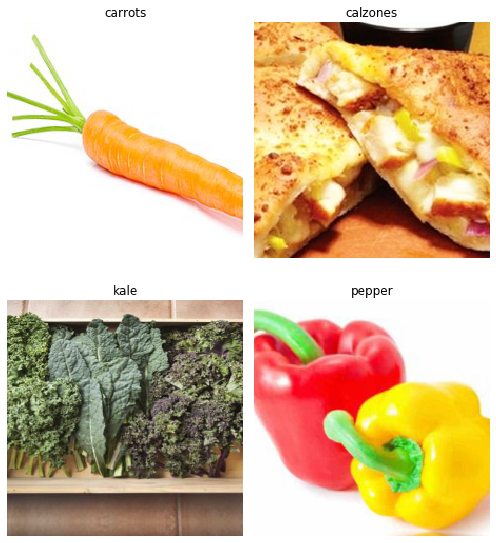

In [6]:
#Let's take a look at some of our pictures then
data.show_batch(rows=2, figsize=(7,8))

In [0]:
#load and learn resnet34 model on data
learn = cnn_learner(data, models.resnet34, metrics=[accuracy])

In [8]:
#fit model
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,1.701950,0.611130,0.824176,01:36
1,0.896119,0.437225,0.865690,01:37
2,0.599485,0.374404,0.890110,01:37
3,0.435997,0.360657,0.893773,01:37


In [0]:
#save stage
learn.save('stage-1')

In [0]:
#un-freeze model to train more
learn.unfreeze()

In [11]:
#find learning rate
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


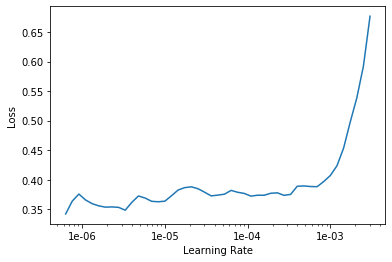

In [12]:
learn.recorder.plot()

In [13]:
#train more on optimum learning rate
learn.fit_one_cycle(4, max_lr=slice(1e-05, 1e-03))

epoch,train_loss,valid_loss,accuracy,time
0,0.381025,0.353213,0.894383,01:38
1,0.374287,0.350435,0.896215,01:39
2,0.223461,0.259162,0.926129,01:39
3,0.148097,0.248912,0.926740,01:39


In [0]:
learn.save('stage-2')


Training: **resnet50**

In [0]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=229, num_workers=2, bs=32).normalize(imagenet_stats)

In [0]:
learn_resnet50 = cnn_learner(data, models.resnet50, metrics=[accuracy])

In [26]:
learn_resnet50.fit_one_cycle(6)

epoch,train_loss,valid_loss,accuracy,time
0,1.062910,0.514843,0.846764,01:51
1,0.754157,0.445021,0.880952,01:57
2,0.550794,0.351247,0.904151,01:55
3,0.385038,0.280164,0.922466,01:54
4,0.316375,0.247765,0.927350,01:54
5,0.224134,0.240492,0.931013,01:56


In [0]:
#save stage
learn_resnet50.save('stage-1')

In [0]:
learn_resnet50.unfreeze()

In [29]:
#find learning rate
learn_resnet50.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


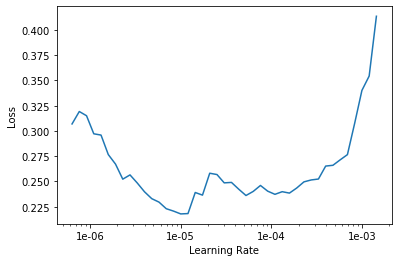

In [30]:
#plot learning graph
learn_resnet50.recorder.plot() 

In [38]:
#train more on optimum learning rate
learn_resnet50.fit_one_cycle(4, max_lr=slice(1e-05, 1e-04))


epoch,train_loss,valid_loss,accuracy,time
0,0.162156,0.243522,0.927961,02:09
1,0.191095,0.242999,0.938339,02:10
2,0.107688,0.218454,0.941392,02:09
3,0.083151,0.215279,0.940781,02:09
